**[Do not edit the contents of this cell]**

# MSc in Bioinformatics and Theoretical Systems Biology - Maths and Stats Assignment 2018/19

This assignment is to be completed in Python, R or Julia and returned as a Jupyter notebook. There are 4 types of cells used in this notebook:
1. Cells containing tasks and instructions to be completed. Do not edit these. These are clearly labelled.
2. Cells in which you are meant to provide an answer in Markdown format.
3. Cells containing code that defines e.g. which packages to load, but can also contain routines and snippets of codes that you should use.
4. Cells that contain the Python/R/Julia code that you write to solve the problems set.

Each of these cells will contain explit comments at the top telling you whether to edit or not edit a cell. In Code cells comments are specified by the "#" character. In the Markdown Answer Cells, replace the xxx by your answer, whenever these are present. You will have to execute all code and Markdown cells in order to (i) make use of the provided code, and (ii) format the markdown appropriately.

There are four problems to be tackled:
1. Data exploration [40%]
2. Hypothesis testing [20%]
3. Regression [20%]
4. Classification [20%]

For each questions there several parts of different difficulty. Where appropriate, further reading will be given at the start of each question.

You will have to specify which language (and version) you used and all packages needed in order to run all Code cells. Please add this information in the next two cells. You can also use a mix of languages but any change has to be clearly indicated in the appropriate cell.


The kernel for this Jupyter notebook is python, version 3.7, with the following packages: numpy, matplotlib.pyplot, scipy, pandas, seaborn, sklearn, statsmodels

In [1]:
# here import all libraries or packages needed
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

%matplotlib inline
# ...

C:\Users\patri\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**[Do not edit the contents of this cell]**

## Problem 1: data exploration

We consider a subset of data coming from a putative association study where researchers collected various metrics and phenotypes to find associations with a putative generic cardiovascular disease.
All recruited subjects are adults.
For each subject several predictor variables are recorded: sex, height (in cm), mass (in kg), whether is a smoker or not, her/his ethnicity, and levels of 5 different metabolites (labelled A-E).
Each subject has a unique ID number. 
For each subject a disease score, the response variable, measuring the severity of the disease phenotype in arbitrary units, is provided.
The data is provided in the file `association.csv`.

### Part 1

Load the dataset `association.csv`.
How many unique records of subjects do we have? How many unique predictor variables?

In [2]:
# [Write your code in this cell]

# load in data
association_df = pd.read_csv('association.csv')
glucose_df = pd.read_csv('glucose.csv')

# find duplicate traing examples and remove last instance
association_df.loc[association_df.duplicated(keep=False),:]
association_df.drop_duplicates(keep='first', inplace=True)

# find duplicates in glucose_df
glucose_df[glucose_df['subject']=='ID18']

# Since we have two different values with a unique identifier I will remove one and set others value to the mean.
avg_glucose = glucose_df.iloc[[17,62]].glucose_index.mean()
glucose_df.drop_duplicates(subset=['subject'], keep='first',inplace=True)
glucose_df.at[17, 'glucose_index'] = avg_glucose

# Ensure alignment of dataframe shapes
print(glucose_df.shape[0] == association_df.shape[0])

# merge dataframes on ID
association_df.set_index('subject', inplace=True)
glucose_df.set_index('subject', inplace=True)

association_df = pd.merge(association_df, glucose_df, on='subject')
association_df.head()

True


,sex,height,mass,smoker,ethnicity,metabolite_A,metabolite_B,metabolite_C,metabolite_D,metabolite_E,disease_score,glucose_index
subject,,,,,,,,,,,,
ID85,1,171.476882,71.070214,0,Asian,0.777283,1.544216,0.200118,4.963626,9.981923,0.967832,12.922944
ID86,0,186.503967,80.276194,0,Black/African/Caribbean,0.984182,2.040572,0.293487,5.250400,10.745194,-5.513232,13.573983
ID48,1,177.289453,70.102716,1,Other,0.989442,1.983742,0.410665,4.302722,9.032480,-3.236092,10.786252
ID4,0,182.755756,76.286511,0,White,0.998088,1.940030,0.183667,4.243840,8.597430,-7.306565,10.671802
ID63,1,178.761595,70.987086,0,Asian,0.893859,1.794609,0.554105,4.006878,8.530953,1.514585,10.002689


**[Provide your answer here]**
- The number of unique records of subjects in the dataset is: 105
- The number of variables in the dataset is: 12

**[Do not edit the contents of this cell]**

### Part 2

Produce a plot to illustrate the distribution of variables sex, mass, ethnicity, metabolite_A. Choose the most appropriate visualisation depending on the type of each variable.

(103, 12)


C:\Users\patri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


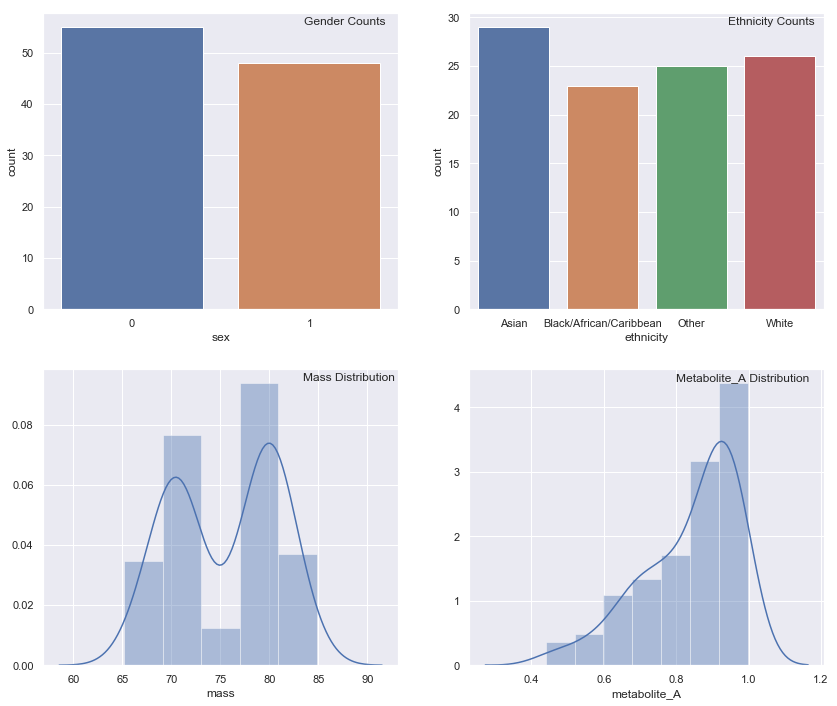

In [3]:
# [Write your code in this cell]

# Create a new dataframe containing only completed values.
association_full_df = association_df.dropna()
print(association_full_df.shape) # 2 rows dropped

sns.set(style="darkgrid")

fig = plt.figure(figsize=(14,12))
fig.add_subplot(2,2,1)
sns.countplot(association_full_df['sex'])
plt.title('Gender Counts', y=0.94, x=0.85)

fig.add_subplot(2,2,2)
sns.countplot(association_full_df['ethnicity'])
plt.title('Ethnicity Counts', y=0.94, x=0.85)

fig.add_subplot(2,2,3)
sns.distplot(association_full_df['mass'])
plt.title('Mass Distribution', y=0.94, x=0.86)

fig.add_subplot(2,2,4)
sns.distplot(association_full_df['metabolite_A'])
plt.title('Metabolite_A Distribution', y=0.94, x=0.77)

plt.show()
# ax = fig.add_subplot(2, 2,1)

**[Do not edit the contents of this cell]**

### Part 3

Write a function that returns the Body Mass Index (BMI).Calculate BMI for each subject and add it as new variable in the data set.

In [4]:
# [Write your code in this cell]
association_df['BMI'] = association_df['mass']/(association_df['height']/100)**2
association_df.head(3)

,sex,height,mass,smoker,ethnicity,metabolite_A,metabolite_B,metabolite_C,metabolite_D,metabolite_E,disease_score,glucose_index,BMI
subject,,,,,,,,,,,,,
ID85,1,171.476882,71.070214,0,Asian,0.777283,1.544216,0.200118,4.963626,9.981923,0.967832,12.922944,24.169990
ID86,0,186.503967,80.276194,0,Black/African/Caribbean,0.984182,2.040572,0.293487,5.250400,10.745194,-5.513232,13.573983,23.078662
ID48,1,177.289453,70.102716,1,Other,0.989442,1.983742,0.410665,4.302722,9.032480,-3.236092,10.786252,22.303296


**[Do not edit the contents of this cell]**

### Part 4

Calculate the correlation matrix between numerical predictors. Use this information to impute any missing values, if possible.

Metabolite A, 23rd training example predicted as: 0.6444997366952995
Metabolite A, 87rd training example predicted as: 0.9290746076809576


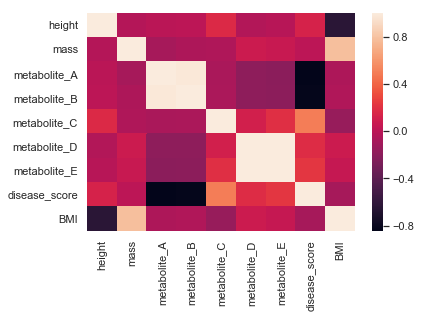

In [5]:
# [Write your code in this cell]

association_num_df = association_df.drop(['sex', 'smoker', 'ethnicity', 'glucose_index'], axis=1)

corr = association_num_df.corr()
sns.heatmap(corr)
corr

lin_reg = LinearRegression()
X = association_full_df['metabolite_B'].values
X = X.reshape(103,1)
y = association_full_df['metabolite_A'].values
y = y.reshape(103,1)

model = lin_reg.fit(X,y)

ID_23_prediction = model.predict(association_df.loc['ID23']['metabolite_B'])[0][0]
ID_87_prediction = model.predict(association_df.loc['ID87']['metabolite_B'])[0][0]
print('Metabolite A, 23rd training example predicted as: ' + str(ID_23_prediction))
print('Metabolite A, 87rd training example predicted as: ' + str(ID_87_prediction))

association_df.at['ID23', 'metabolite_A'] = ID_23_prediction
association_df.at['ID87', 'metabolite_A'] = ID_87_prediction

**[Do not edit the contents of this cell]**

### Part 5

Assuming that a disease status is recorded when the disease score is greater than 5, add a new response variable in the dataset defining the diseases status of each subject.

In [6]:
# [Write your code in this cell]

association_df['disease_status'] = np.where(association_df['disease_score'] > 5, 1, 0)
association_df['disease_status'].sum() # 14 diseased people

14

**[Do not edit the contents of this cell]**

## Problem 2: hypothesis testing

Starting from the same dataset in Problem 1, provide answers for the following questions.

### Part 1

Given this sample space of subjects, what is the probability that a given subject is diagnosed as diseased? What is the probability that a subject is diagnosed as diseased given that he/she is not a smoker?

In [7]:
# [Write your code in this cell]

print(association_df.groupby('disease_status').size().div(len(association_df)))

print(association_df.groupby(['disease_status', 'smoker']).size())
# Probability of diseased | non smoker is equal to the intersection of diseased and non smoker / probability of non smoker
intersection = 7/105
non_smoker_probs = 81/105

intersection/non_smoker_probs

disease_status
0    0.866667
1    0.133333
dtype: float64
disease_status  smoker
0               0         74
                1         17
1               0          7
                1          7
dtype: int64


0.08641975308641975

**[Provide your answer here]**
- The probability that a subject is diseased is: 0.1320
- The probability that a subject is diseased given that she/he is not a smoker is: 0.0864

**[Do not edit the contents of this cell]**

### Part 2

Assuming that they are Normally distributed, estimate mean and variance for the distributions of height and mass separately for males and females. Use **either** a frequentist **or** likelihoodist **or** Bayesian approach.

In [8]:
# [Write your code in this cell]

print('Height')
print('Mean woman height: ' + str(association_df.loc[association_df['sex'] == 1]['height'].mean()))
print('Variance woman height: ' + str(association_df.loc[association_df['sex'] == 1]['height'].var()))

print('Mean man height: ' + str(association_df.loc[association_df['sex'] == 0]['height'].mean()))
print('Variance man height: ' + str(association_df.loc[association_df['sex'] == 0]['height'].var()))


print('\nMass')
print('Mean woman mass: ' + str(association_df.loc[association_df['sex'] == 1]['mass'].mean()))
print('Variance woman mass: ' + str(association_df.loc[association_df['sex'] == 1]['mass'].var()))

print('Mean man mass: ' + str(association_df.loc[association_df['sex'] == 0]['mass'].mean()))
print('Variance man mass: ' + str(association_df.loc[association_df['sex'] == 0]['mass'].var()))

Height
Mean woman height: 178.18186776141937
Variance woman height: 21.17244615491872
Mean man height: 178.77109675031406
Variance man height: 27.03025338771781

Mass
Mean woman mass: 70.33025107998441
Variance woman mass: 4.053329369363679
Mean man mass: 80.10691251520628
Variance man mass: 3.487426146492937


**[Do not edit the contents of this cell]**

### Part 3

Test whether height is different between males and females. Perform the same test on the mass variable. Define (in words) which ones are your null and alternative hypotheses and significance threshold. Finally, discuss (in words) any conclusion you can make out the results of your statistical tests.

In [9]:
wom_height = association_df.loc[association_df['sex'] == 1]['height']
man_height = association_df.loc[association_df['sex'] == 0]['height']
print(stats.ttest_ind(wom_height, man_height, equal_var = False))

wom_mass = association_df.loc[association_df['sex'] == 1]['mass']
man_mass = association_df.loc[association_df['sex'] == 0]['mass']
print(stats.ttest_ind(wom_mass, man_mass, equal_var = True))

Ttest_indResult(statistic=-0.616020797475073, pvalue=0.539240682310238)
Ttest_indResult(statistic=-25.814418967682254, pvalue=8.907951602027204e-47)


**[Provide your answer here]**

I will use a significance threshold of 0.05 indicating that results that would occur less than 5% of the time by chance if we  repeated the expreiment are deemed to be significant.

The null hypothesis is that the expected difference in heighet between males and females is zero. The alternate hypothesis is that there is a difference in height between males and females.

A test statistic of -0.6160 is associated with a p Value of 0.5392 meaning that we fail to reject the null hypothesis.

The null hypothesis is that the expected difference in mass between males and females is zero. The alternate hypothesis is that there is a difference in mass between males and females.

A test statistic of -26.0645 is associated with a p Value of 0.2 * 10**-47 indicating that we can reject the null hypothesis and accept that there is a difference in mass between males and females.


**[Do not edit the contents of this cell]**

### Part 4

Repeat the statistical test in Part 3 for all numerical predictor variables in the dataset. How many tests are significant with $\alpha=0.05$?
Calculate corrected p-values for multiple tests using a Bonferroni correction. How many tests are significant now? 

In [10]:
# [Write your code in this cell]
association_num_df.head(3)
df_columns = list(association_num_df.columns.values)
# df_columns

def tTest(myList):
    p_values = []
    for i in myList:
        woman = association_df.loc[association_df['sex'] == 1][i]
        man = association_df.loc[association_df['sex'] == 0][i]
        testStats = stats.ttest_ind(woman, man, equal_var = False)
        p_val = testStats[1]
        p_values.append(p_val)
    return(p_values)

p_values = tTest(df_columns)
print(p_values)


p_adjusted = multipletests(p_values, method='bonferroni')
print(p_adjusted)

[0.539240682310238, 6.694124145896172e-46, 0.4951901695220233, 0.5835844982018759, 0.3555065814214443, 0.7131894616375611, 0.8267336781040077, 0.9545238893314539, 1.5205052418644302e-15]
(array([False,  True, False, False, False, False, False, False,  True]), array([1.00000000e+00, 6.02471173e-45, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.36845472e-14]), 0.005683044988048058, 0.005555555555555556)


**[Provide your answer here]**

Performing independent T Tests between men and women for each variable we can see statistically significant p values for the second and last of our features which correspond to mass and BMI.

These differences are still significant after adjusting for multiple comparisons using the Bonferroni correction.    Indicating that we can reject the null hypothesis and accept that there is a difference between in mass and BMI between men and women.

**[Do not edit the contents of this cell]**

## Problem 3: regression

Assume you have been provided a new variable indicating a generic glucose index level. We know that such glucose index is related to the variable `metabolite_D` given in the previous dataset.

### Part 1

Load the new dataset called `glucose.csv` which gives the measure of a generic glucose level (`glucose_index`) for each tested subject. Perform a regression where `metabolite_D` is the predictor and `glucose_index` is the response variable.

In [11]:
# [Write your code in this cell]

association_df['glucose_index']

X = association_df['metabolite_D'].values
X = X.reshape(105,1)
y = association_df['glucose_index'].values
y = y.reshape(105,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear_model = lin_reg.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
print('linear_model Error: ' + str(MSE))

linear_model.coef_
linear_model.intercept_ 

print('prediction: ' + str(linear_model.predict(association_df.iloc[1]['metabolite_D'])[0][0]))
print('ground truth: '+ str(association_df.iloc[1]['glucose_index']))

linear_model Error: 0.03717414460349036
prediction: 13.769181161416931
ground truth: 13.573982945213402


**[Do not edit the contents of this cell]**

## Problem 4: classification

### Part 1

Implement an algorithm to predict the disease status of a subject given all response variables provided in the dataset. You are free to choose the appropriate statistical tool you prefer. Assess the quality of your classifier.

In [12]:
# prepare data for training. Create dummy variables for ethnicity categorical data
association_df['Asian'] = np.where(association_df['ethnicity']=='Asian',1,0)
association_df['Black/African/Caribbean'] = np.where(association_df['ethnicity']=='Black/African/Caribbean',1,0)
association_df['White'] = np.where(association_df['ethnicity']=='White',1,0)
association_df['Other'] = np.where(association_df['ethnicity']=='Other',1,0)

response_cols = ['sex','height','mass','smoker','metabolite_A','metabolite_B','metabolite_C','metabolite_D','metabolite_E','BMI','Asian','Black/African/Caribbean','White','Other']
response_cols_minus_BMI = ['sex','height','mass','smoker','metabolite_A','metabolite_B','metabolite_C','metabolite_D','metabolite_E','Asian','Black/African/Caribbean','White','Other']


X = association_df[response_cols_minus_BMI]
y = association_df['disease_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)


In [13]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)
y_pred_class_logReg = logReg.predict(X_test)

# calculate accuracy
conf_matrix = metrics.confusion_matrix(y_test, y_pred_class_logReg)
print(conf_matrix)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]

precision = TP/float(TP+FP)
recall = TP/float(TP+FN)

# Evaluation Metrics
print('accuracy: '+str(metrics.accuracy_score(y_test, y_pred_class_logReg)))
print('sensitivity: '+str(metrics.recall_score(y_test, y_pred_class_logReg)))
print('specificity: '+str(TN/float(TN+FP)))
print('PPV: '+str(metrics.precision_score(y_test, y_pred_class_logReg)))
print('F1 Score: '+str(metrics.f1_score(y_test, y_pred_class_logReg)))

[[37  0]
 [ 4  1]]
accuracy: 0.9047619047619048
sensitivity: 0.2
specificity: 1.0
PPV: 1.0
F1 Score: 0.33333333333333337


In [14]:
randomForest = RFECV(RandomForestClassifier(), scoring = 'roc_auc')
randomForest.fit(X_train, y_train)
y_pred_class_randomForest = randomForest.predict(X_test)

# calculate accuracy
conf_matrix = metrics.confusion_matrix(y_test, y_pred_class_randomForest)

print(conf_matrix)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
precision = TP/float(TP+FP)
recall = TP/float(TP+FN)

# Evaluation Metrics
print('accuracy: '+str(metrics.accuracy_score(y_test, y_pred_class_randomForest)))
print('sensitivity: '+str(metrics.recall_score(y_test, y_pred_class_randomForest)))
print('specificity: '+str(TN/float(TN+FP)))
print('PPV: '+str(metrics.precision_score(y_test, y_pred_class_randomForest)))
print('F1 Score: '+str(metrics.f1_score(y_test, y_pred_class_randomForest)))

[[37  0]
 [ 3  2]]
accuracy: 0.9285714285714286
sensitivity: 0.4
specificity: 1.0
PPV: 1.0
F1 Score: 0.5714285714285715


In [15]:
# randomForest model has superior performance over the range of metrics measured with the exception of sensitivity.
# Hence I will use the randomForest model to make the class prediction in the final part of the coursework.

**[Do not edit the contents of this cell]**

### Part 2

Given the classifier you devised in Part 1, predict the disease status of the following subject:
- subject: ID986
- sex: 1
- height: 180.2
- mass: 70.1
- smoker: 1
- ethnicity: "White"
- metabolite_A: 0.5
- metabolite_B: 1.2
- metabolite_C: 0.5
- metabolite_D: 8.5
- metabolite_E: 10.2

In [16]:
# [Write your code in this cell]
subject_986 = np.asarray([1, 180.2, 70.1, 1, 0.5, 1.2, 0.5, 8.5, 10.2,0,0,1,0 ])
subject_986 = subject_986.reshape(1,-1)
subject_986
randomForest_pred = randomForest.predict(subject_986)
randomForest_pred = randomForest_pred[0]
print('disease_status predicted: ' + str(randomForest_pred))


disease_status predicted: 1
